In [1]:
#Import dependencies
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.io as sio
from sklearn.preprocessing import OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
#from keras.utils import to_categorical
from matplotlib import pyplot
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
labels=sio.loadmat('/content/gdrive/MyDrive/118bus/label_118bus.mat')
input=sio.loadmat('/content/gdrive/MyDrive/118bus/data_IEEE118.mat')

Mounted at /content/gdrive


In [6]:
X=input['data_IEEE118'][:,25:60]
#X2=input['data_IEEE118']
#X=np.concatenate((X1,X2),axis=1)
y=labels['label_118bus']
X.shape , y.shape

((211176, 35), (211176, 1))

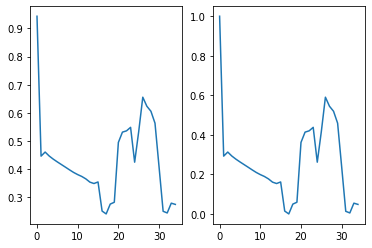

(5000, 35)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_new=min_max_scaler.fit_transform(X.T)
X_norm=X_new.T
plt.subplot(121)
plt.plot(X[1,:])
plt.subplot(122)
plt.plot(X_norm[1,:])
plt.show()
y.shape
X_norm.shape

Class=2, n=777 (15.540%)
Class=1, n=1132 (22.640%)
Class=0, n=3091 (61.820%)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


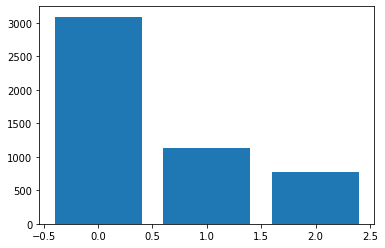

In [ ]:
import imblearn
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_resample(X_norm, y)
print(sorted(Counter(y).items()))
y.shape

[(0, 17314), (1, 17314), (2, 17314)]


(51942,)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape,y.shape

((5000, 35, 1), (5000,))

In [ ]:
from sklearn.model_selection import train_test_split
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [ ]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
#from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau

In [ ]:
verbose, epochs, batch_size = 1, 200, 64
n_timesteps, n_features, n_outputs = X_train.shape[1], 1, y_train.shape[0]
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(n_timesteps, n_features),activation='tanh'))
model.add(Dropout(0.1))

In [ ]:
tf.keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001,center=True,scale=True)
model.add(Dense(50,activation='tanh'))
tf.keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001,center=True,scale=True)
model.add(Dense(50,activation='tanh'))
tf.keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001,center=True,scale=True)
model.add(Dense(3, activation='softmax'))
#model.compile(keras.optimizers.RMSprop(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics='accuracy')
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))